#Notebook Overview

A pipeline for extracting the key frame numbers on the basis of persistence.

In [1]:
!pip install giotto-tda


In [2]:
import cv2
import os
import pandas as pd
import numpy as np
import pickle as pkl
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import matplotlib.pyplot as plt

Mounted at /content/drive


In [3]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [4]:
def extract_frames(video_path, destination_folder):
  """ Function to Extract the frames from a video and store it in a destination path """
  if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
  cap = cv2.VideoCapture(video_path)
  if not cap.isOpened():
    print("Error: Could not open video.")
    return
  frame_count = 0
  while True:
    ret, frame = cap.read()
    if not ret:
      break
    frame_filename = os.path.join(destination_folder, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, frame)
    frame_count += 1
    # Release the vco
    cap.release()
  print(f"Frames extracted: {frame_count}")
# extract_frames('path_to_your_video.mp4', 'path_to_destination_folder')

In [5]:
extract_frames('path_to_your_video.mp4', 'path_to_destination_folder')

Error: Could not open video.


0       807.698889
1       815.843735
2       816.102102
3       831.816126
4       850.940096
           ...    
3187    815.492874
3188    805.513783
3189    838.990877
3190    828.066401
3191    828.772018
Length: 3192, dtype: float64
DataFrame 
0    807.698889
1    815.843735
2    816.102102
3    831.816126
4    850.940096
dtype: float64

Shape : (3192,)


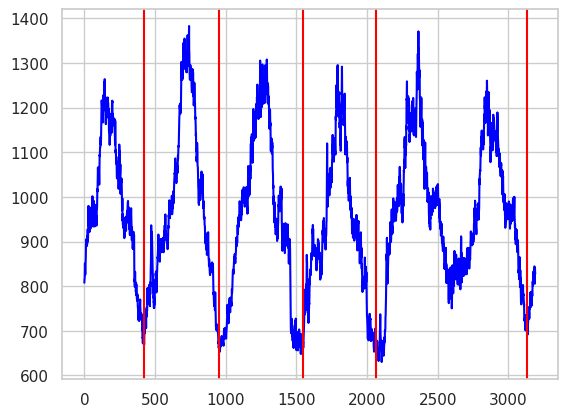

In [6]:
deep_distance_path_old = '/content/drive/MyDrive/Cow_teats/GH010069_dis_deep.txt'
deep_distance_path = '/content/drive/MyDrive/Cow_teats/GH060066_dis_deep.txt'
key_frames_old = [321,930,1397,1945,2503,3571,4105]
key_frames = [425, 950, 1550, 2066, 3132]
# Loading the deep distance
df = pd.read_csv(deep_distance_path,sep=' ',header=None)
# Looking at the points in the ground truth on the distplot
# Taking the mean of all the columns
df_final = df.mean(axis=1)
print(df_final)
print(f'DataFrame \n{df_final.head()}\n')
print(f'Shape : {df_final.shape}')
plt.plot(np.arange(0,df_final.shape[0]),df_final,color='blue')
for i in key_frames:
  plt.axvline(i,color='red')
plt.show()

In [7]:
from gtda.homology import VietorisRipsPersistence
from gtda.time_series import SlidingWindow
windows = SlidingWindow(size=100, stride=10)
# Fit and transform X
X_sw = windows.fit_transform(df_final)
print(f'Shape of the Sliding Window : {X_sw.shape}')
print(X_sw)

Shape of the Sliding Window : (310, 100)
[[ 816.10210228  831.81612588  850.94009591 ... 1054.97112281
  1058.12330622 1066.74400128]
 [ 900.63341522  897.45434578  894.99043841 ... 1091.30684091
  1099.12739566 1110.39471053]
 [ 899.54099466  925.09446916  927.43053441 ... 1147.51269341
  1173.355381   1200.45425413]
 ...
 [ 830.87799647  830.19697953  836.37717825 ...  779.60761081
   778.06169509  788.67137709]
 [ 827.92475138  798.26164237  802.31147775 ...  818.54821019
   809.30111497  823.05939863]
 [ 759.24505047  778.71680841  782.38624187 ...  838.99087703
   828.0664005   828.77201841]]


In [8]:
#infer the frequency of the data
freq = df_final.asfreq(pd.infer_freq(df_final.index))
print(freq)

1970-01-01 00:00:00.000000000   NaN
1970-01-01 00:00:00.000000001   NaN
1970-01-01 00:00:00.000000002   NaN
1970-01-01 00:00:00.000000003   NaN
1970-01-01 00:00:00.000000004   NaN
                                 ..
1970-01-01 00:00:00.000003187   NaN
1970-01-01 00:00:00.000003188   NaN
1970-01-01 00:00:00.000003189   NaN
1970-01-01 00:00:00.000003190   NaN
1970-01-01 00:00:00.000003191   NaN
Freq: N, Length: 3192, dtype: float64


In [9]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Assuming df_final is already created as per your provided code

# # Set the size of the plot
# plt.figure(figsize=(10, 4))

# # Plot df_final
# plt.plot(df_final.index, df_final, color='blue')

# # Add a title and labels
# plt.title('Deep Distance Analysis', fontsize=20)
# plt.xlabel('Frame Index', fontsize=16)
# plt.ylabel('Mean Deep Distance', fontsize=16)

# # Add vertical lines for key frames
# for index in key_frames:
#     plt.axvline(index, color='red', linestyle='--', alpha=0.5)

# # Display the plot
# plt.show()


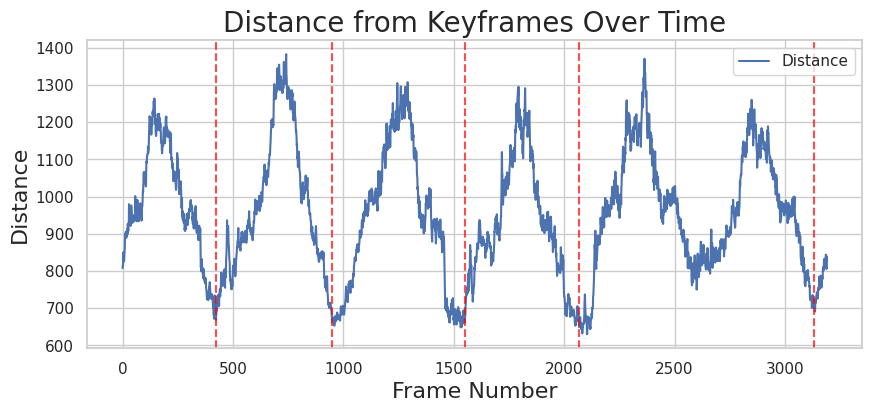

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df_final.index = pd.RangeIndex(start=0, stop=len(df_final), step=1)

# Plotting the distance values as a time series
plt.figure(figsize=(10, 4))
plt.plot(df_final.index, df_final, label='Distance')
plt.title('Distance from Keyframes Over Time', fontsize=20)
plt.ylabel('Distance', fontsize=16)
plt.xlabel('Frame Number', fontsize=16)

# Marking key frames (anomalies)
for kf in key_frames:
    plt.axvline(kf, color='red', linestyle='--', alpha=0.7)

plt.legend()
plt.show()


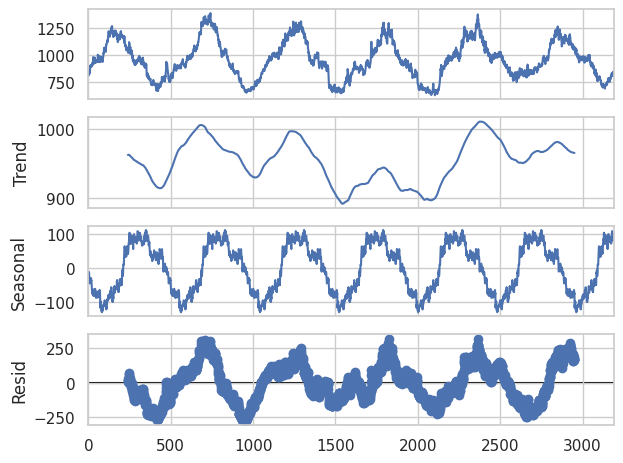

In [11]:
# Performing a time series decomposition
bias = 30
result = seasonal_decompose(df_final, model='additive', period=450+bias)
fig = result.plot()
plt.show()

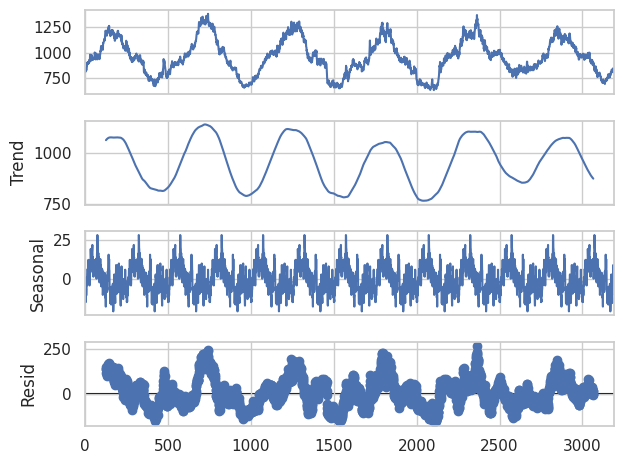

In [12]:
# Performing a time series decomposition
result = seasonal_decompose(df_final[:], model='additive', period=250)
fig = result.plot()

In [13]:
result.resid.values

array([nan, nan, nan, ..., nan, nan, nan])

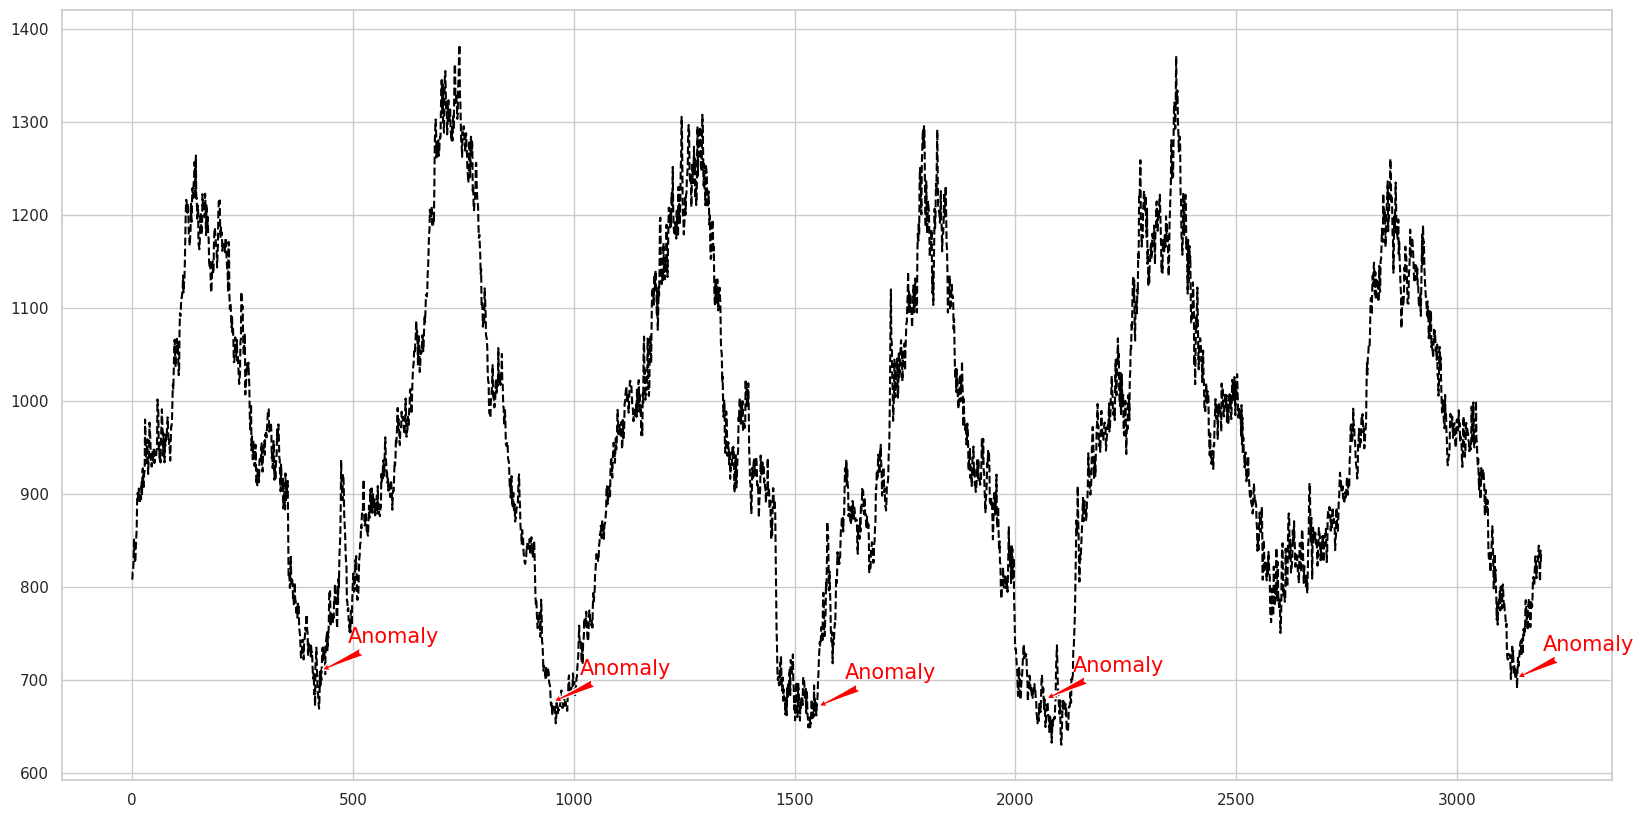

In [14]:
import matplotlib.pyplot as plt

# Setting plot and font sizes
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=15)

# Creating the plot
fig, ax = plt.subplots()
x = df_final.index
y = df_final.values
ax.plot(x, y, color='black', linestyle='--')

# Annotate an anomaly - choose an appropriate keyframe index
for keyframe in key_frames :
  anomaly_index = keyframe # Example: using the first key frame
  if anomaly_index < len(x):
      ax.annotate('Anomaly', (x[anomaly_index], y[anomaly_index]), xytext=(20, 20),
                  textcoords='offset points', color='red',
                  arrowprops=dict(facecolor='red', arrowstyle='fancy'))

plt.show()


In order to detect the anomalies , which are considered as keyframes , we have to split the data into windows of different window sizes so that we can look at these data points more closely

In [15]:
from scipy.signal import argrelextrema

# Sliding Window Analysis
window_size = 50  # Define your window size here
step_size = 10    # Define step size for the sliding window

# Loop to perform analysis on each window
for start in range(0, len(df_final) - window_size + 1, step_size):
    end = start + window_size
    window_data = df_final[start:end]

    # Detecting local minima in the window
    local_minima_indices = argrelextrema(window_data.values, np.less)[0]
    local_minima = start + local_minima_indices  # Adjust indices to the original data frame

    # Print window statistics and local minima
    #print(f"Window {start}-{end} Local Minima (potential keyframes): {local_minima}")

    # Optional: Check if these local minima align with your known keyframes
    for lm in local_minima:
        if lm in key_frames:
            print(f"Detected known keyframe at index {lm} in window {start}-{end}")

Detected known keyframe at index 3132 in window 3090-3140
Detected known keyframe at index 3132 in window 3100-3150
Detected known keyframe at index 3132 in window 3110-3160
Detected known keyframe at index 3132 in window 3120-3170
Detected known keyframe at index 3132 in window 3130-3180


In [16]:
local_minima_indices = argrelextrema(df_final.values, np.less)[0]
len(np.unique(local_minima_indices))

821

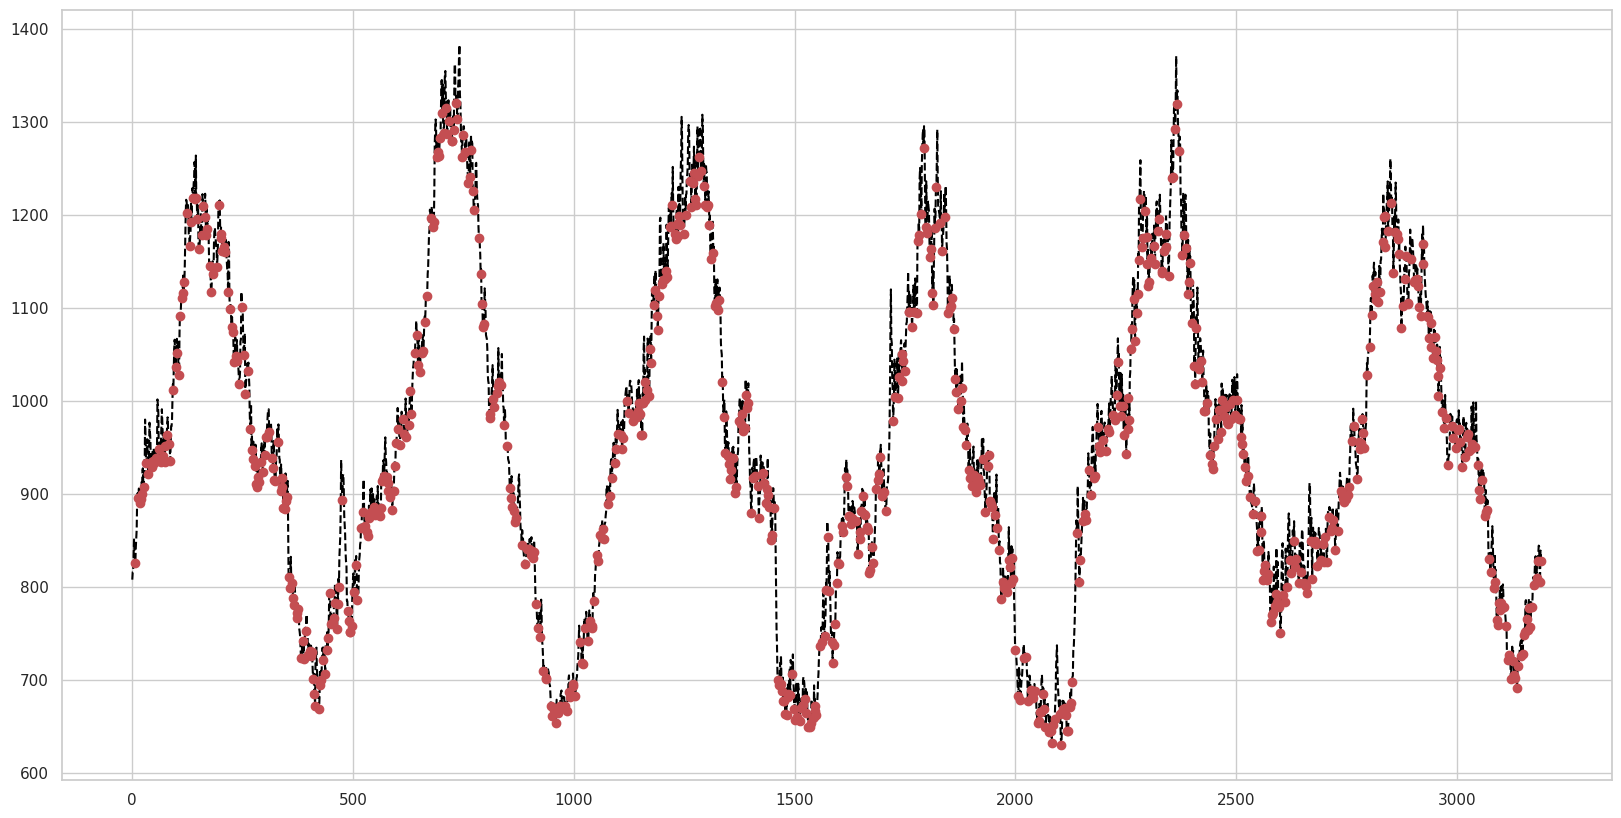

In [17]:

# Setting plot and font sizes
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=15)

# Creating the plot
fig, ax = plt.subplots()
x = df_final.index
y = df_final.values

# Plot the main line
ax.plot(x, y, color='black', linestyle='--')

# Annotate anomalies as red points
for keyframe in local_minima_indices:
    if keyframe < len(x):
        # Plot red points at each local minima
        ax.plot(x[keyframe], y[keyframe], 'ro')  # 'ro' stands for red circle markers

plt.show()

We need a better approach for this as we can see that there occurrences of a lot of local minima which can or cannot be the key frames.

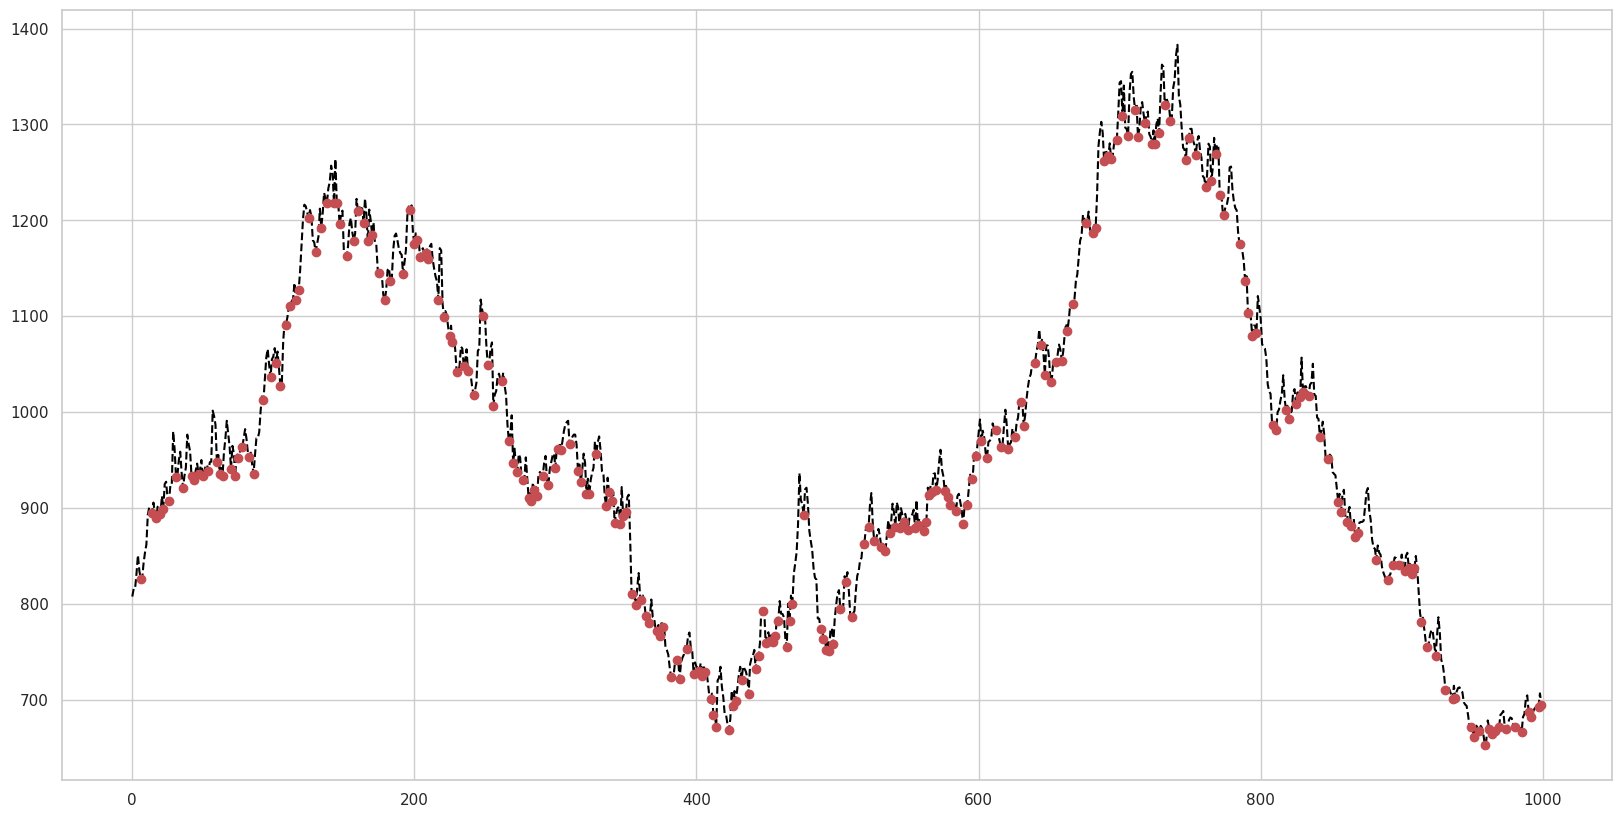

In [18]:
# Setting plot and font sizes
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=15)

# Creating the plot
fig, ax = plt.subplots()
x = df_final.index[:1000]  # Limit to first 1000 data points
y = df_final.values[:1000]  # Limit to first 1000 data points

# Plot the main line
ax.plot(x, y, color='black', linestyle='--')

# Annotate anomalies as red points
for keyframe in local_minima_indices:
    if keyframe < 1000:  # Check if the keyframe is within the first 1000 data points
        ax.plot(x[keyframe], y[keyframe], 'ro')  # 'ro' stands for red circle markers

plt.show()

In [19]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
from gtda.time_series import SlidingWindow

time_series = df_final.values

# Define the sliding window parameters
window_size = 100
step_size = 10

# Initialize the SlidingWindow
sw = SlidingWindow(size=window_size, stride=step_size)

# Apply the sliding window transformation
# Reshape time_series to fit the transformers expected input shape
windowed_data = sw.fit_transform(time_series.reshape(-1, 1))


for i, window in enumerate(windowed_data):
    start_index = i * step_size
    end_index = start_index + window_size
    flattened_window = window.flatten()
    local_minima_indices = argrelextrema(flattened_window, np.less)[0]
    global_indices = start_index + local_minima_indices
    for index in global_indices:
        if index in key_frames:
            print(f"Detected known keyframe at index {index} in window {start_index}-{end_index}")

Detected known keyframe at index 2066 in window 1970-2070
Detected known keyframe at index 2066 in window 1980-2080
Detected known keyframe at index 2066 in window 1990-2090
Detected known keyframe at index 2066 in window 2000-2100
Detected known keyframe at index 2066 in window 2010-2110
Detected known keyframe at index 2066 in window 2020-2120
Detected known keyframe at index 2066 in window 2030-2130
Detected known keyframe at index 2066 in window 2040-2140
Detected known keyframe at index 2066 in window 2050-2150
Detected known keyframe at index 2066 in window 2060-2160


In [20]:
import numpy as np
import pandas as pd

g_minima_idx = []
g_minima_val = []
k = 0
for i in np.array([500, 1000, 1500, 2000, 2500, 3000, len(df_final)]):
    # Limit the analysis to the current subset
    data_subset = df_final.values[k:i]

    # Find the global minimum value within this subset
    global_minimum_value = np.min(data_subset)

    # Find the indices of the global minimum value (relevant to the subset)
    relative_indices = np.where(data_subset == global_minimum_value)[0]
    absolute_indices = relative_indices + k
    g_minima_idx.append(absolute_indices)
    g_minima_val.append(global_minimum_value)

    k = i  # Update k to the next starting index

print("Global minimum values:", g_minima_val)
print("Indices of global minima:", g_minima_idx)
print(len(g_minima_idx))

Global minimum values: [668.94199371875, 653.14797596875, 661.8681031250001, 648.68656925, 630.0312595625, 750.264583625, 691.0031871562499]
Indices of global minima: [array([423]), array([959]), array([1482]), array([1531]), array([2104]), array([2600]), array([3136])]
7


In [21]:
# Ground Truth
#key_frames = [321, 930, 1397, 1945, 2503, 3571, 4105]

# Flatten the global minima indices
flattened_minima_indices = [idx for sublist in g_minima_idx for idx in sublist]

closest_key_frames = {}

# Finding the abs diff
for min_idx in flattened_minima_indices:
    # Calculate absolute differences with all key frames
    differences = [abs(min_idx - kf) for kf in key_frames]

    # Find the minimum difference and the corresponding key frame
    min_difference = min(differences)
    closest_key_frame = key_frames[differences.index(min_difference)]

    closest_key_frames[min_idx] = (closest_key_frame, min_difference)

for min_idx, (kf, diff) in closest_key_frames.items():
    print(f"Global minima index {min_idx} is closest to key frame {kf} with a difference of {diff}")


Global minima index 423 is closest to key frame 425 with a difference of 2
Global minima index 959 is closest to key frame 950 with a difference of 9
Global minima index 1482 is closest to key frame 1550 with a difference of 68
Global minima index 1531 is closest to key frame 1550 with a difference of 19
Global minima index 2104 is closest to key frame 2066 with a difference of 38
Global minima index 2600 is closest to key frame 3132 with a difference of 532
Global minima index 3136 is closest to key frame 3132 with a difference of 4


Now that we have developed a basic understanding of how the global minima(of a particular neighbourhood) in the distances correspond to the keyframes. For this videos , most of the global minimas which are found are really close to the ground truth. We can further analyse these locations to make our findings more concerete

In [22]:
import plotly.graph_objects as go

# Ground Truth
#key_frames = [321, 930, 1397, 1945, 2503, 3571, 4105]

# Global Minaiina indices
flattened_minima_indices = [idx for sublist in g_minima_idx for idx in sublist]

# Create a scatter plot for the entire data series
data_scatter = go.Scatter(
    x=df_final.index,
    y=df_final,
    mode='lines',
    name='Data Series',
    line=dict(color='lightgrey')
)

# Create a scatter plot for the global minima
minima_scatter = go.Scatter(
    x=flattened_minima_indices,
    y=df_final.iloc[flattened_minima_indices],
    mode='markers',
    name='Global Minima',
    marker=dict(color='red')
)

# Create a scatter plot for the key frames
keyframe_scatter = go.Scatter(
    x=key_frames,
    y=df_final.iloc[key_frames],
    mode='markers',
    name='Key Frames',
    marker=dict(color='blue')
)

#Combine the  above plots
fig = go.Figure(data=[data_scatter, minima_scatter, keyframe_scatter])

window_boundaries = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for line in window_boundaries:
    fig.add_vline(x=line, line_width=1, line_dash="dash", line_color="grey")

# Update layout
fig.update_layout(
    title='Global Minima, Key Frames, and Data Series Visualization',
    xaxis_title='Index',
    yaxis_title='Value',
    legend_title='Legend'
)

fig.show()


Now we have some clarity on where to start our analysis from and we can go forward and start to look at the closest points to the local minimas which can be potential key frames in our data.

# Using Isolation forest to predict the outliers

The main idea, which is different from other popular outlier detection methods, is that Isolation Forest explicitly identifies anomalies instead of profiling normal data points. Isolation Forest, like any tree ensemble method, is based on decision trees.

In other words, Isolation Forest detects anomalies purely based on the fact that anomalies are data points that are few and different. The anomalies isolation is implemented without employing any distance or density measure.

When applying an IsolationForest model, we set contamination = outliers_fraction, that is telling the model what proportion of outliers are present in the data. This is a trial/error metric.
Fit and predict (data) performs outlier detection on data, and returns 1 for normal, -1 for the anomaly.

Finally, we visualize anomalies with the Time Series view.

<Axes: >

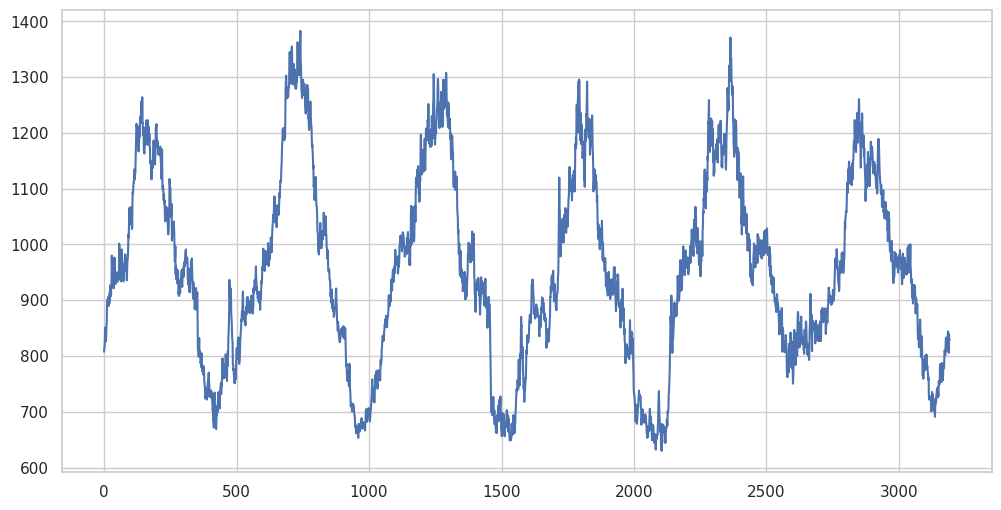

In [23]:
#PLot the data values
detected_frames = flattened_minima_indices
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
df_final.plot()


In [24]:
outliers_fraction = float(.09)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df_final.values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)

# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.09)

In [26]:
temp = model.predict(data)
df_new = pd.DataFrame(df_final.values,columns=['data'])
df_new['anomaly'] = model.predict(data)
df_new[df_new['anomaly']==-1]

,data,anomaly
136,1228.728966,-1
137,1222.425720,-1
139,1233.325932,-1
140,1240.043495,-1
141,1257.001919,-1
...,...,...
2847,1226.887978,-1
2848,1233.031784,-1
2849,1260.509525,-1
2850,1247.428932,-1


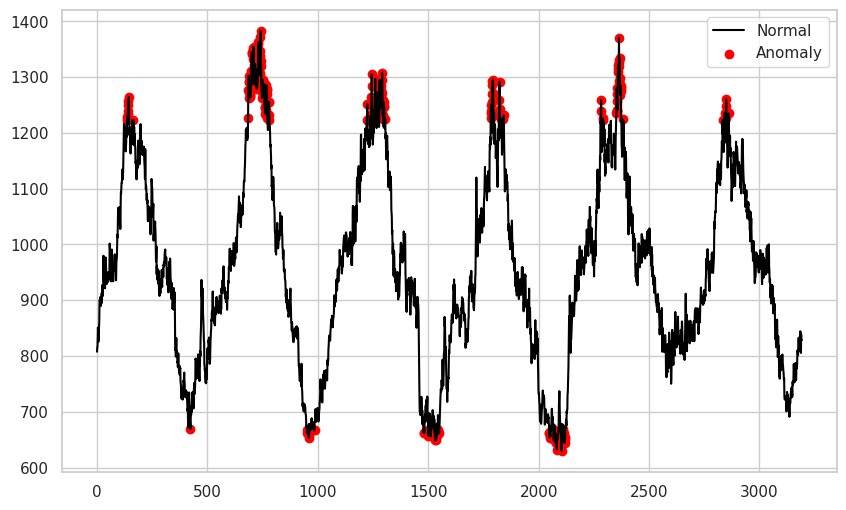

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# Assuming df_new is a DataFrame and has the same index as df_final
# Plotting df_final as a line
ax.plot(df_final.index, df_final, color='black', label='Normal')

# Plotting anomalies where df_new['anomaly'] equals -1
anomalies = df_final[df_new['anomaly'] == -1]
ax.scatter(anomalies.index, anomalies, color='red', label='Anomaly')

plt.legend()
plt.show()


In [28]:
# Looking at the anomalies which are detected
df_new[(df_new['anomaly']==-1)&(df_new['data']<=800)]

,data,anomaly
423,668.941994,-1
951,661.318512,-1
952,667.703188,-1
954,667.570734,-1
955,667.374886,-1
...,...,...
2116,644.987392,-1
2117,649.303055,-1
2118,650.620823,-1
2119,644.514194,-1


When we look at the datapoints which are detect as anaomaly and is also less than 800 gives 29 data points

In [29]:
df_final.mean()-1.5*(df_final.std())

699.3308321354216

In [30]:
probable_frames = (np.array(df_new[(df_new['anomaly']==-1)&(df_new['data']<=df_final.mean()-1.5*(df_final.std()))].index.values))
print(probable_frames)
print(len(probable_frames))

[ 423  951  952  954  955  958  959  960  964  965  966  974  985 1479
 1482 1499 1501 1506 1507 1512 1526 1529 1530 1531 1532 1533 1534 1535
 1536 1537 1540 1541 1542 1543 1545 1549 2048 2049 2050 2051 2052 2053
 2055 2057 2065 2067 2068 2069 2070 2074 2075 2076 2077 2078 2079 2080
 2081 2082 2083 2084 2085 2086 2087 2088 2089 2100 2102 2103 2104 2105
 2106 2108 2112 2114 2116 2117 2118 2119 2120]
79


We need some filteration because the number of datapoints which are detected using the isolation forest is too many.

In [31]:
key_frames

[425, 950, 1550, 2066, 3132]

# Exploring the Clusters

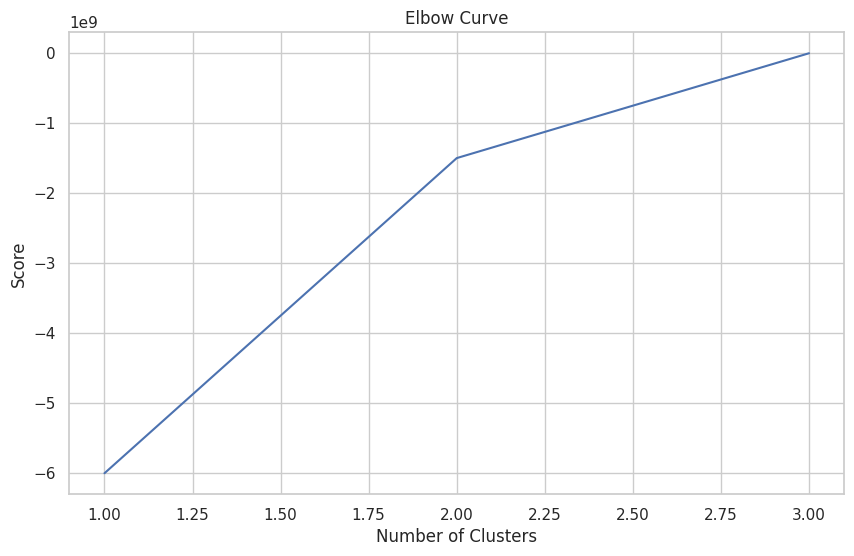

In [32]:
data = pd.DataFrame([df_new.index, df_new['data'], df_new['anomaly']])
n_cluster = range(1, 4)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

From the above elbow curve, we see that the graph levels off after 2 clusters, implying that the addition of more clusters do not explain much more of the variance in our relevant variable.

In [33]:
df_new

,data,anomaly
0,807.698889,1
1,815.843735,1
2,816.102102,1
3,831.816126,1
4,850.940096,1
...,...,...
3187,815.492874,1
3188,805.513783,1
3189,838.990877,1
3190,828.066401,1


# TDA

In [34]:
flattened_minima_indices

[423, 959, 1482, 1531, 2104, 2600, 3136]

In [35]:
# Looking at the distance matrix
reference_key_frames = flattened_minima_indices
df_final

0       807.698889
1       815.843735
2       816.102102
3       831.816126
4       850.940096
           ...    
3187    815.492874
3188    805.513783
3189    838.990877
3190    828.066401
3191    828.772018
Length: 3192, dtype: float64

In [138]:
from gtda.time_series import SlidingWindow
windows = SlidingWindow(size=500, stride=50)
# Fit and transform X
X_sw = windows.fit_transform(df_final)
print(f'Shape of the Sliding Window : {X_sw.shape}')
print(X_sw)

Shape of the Sliding Window : (54, 500)
[[ 933.33867263  933.58469391  929.26332475 ...  904.57152741
   895.93585016  880.18619922]
 [1017.81491853 1012.16723641 1035.32612428 ...  882.90310856
   900.32153706  903.464119  ]
 [1249.48906706 1217.69887169 1263.92595666 ... 1053.67094228
  1051.08938225 1062.70214853]
 ...
 [ 801.95035175  783.85308841  826.72119512 ...  787.92569737
   764.36294734  782.42996778]
 [ 803.9488125   834.09488484  846.97159963 ...  714.54522903
   717.49555781  725.81636806]
 [ 841.92564194  827.77296822  850.42101294 ...  838.99087703
   828.0664005   828.77201841]]


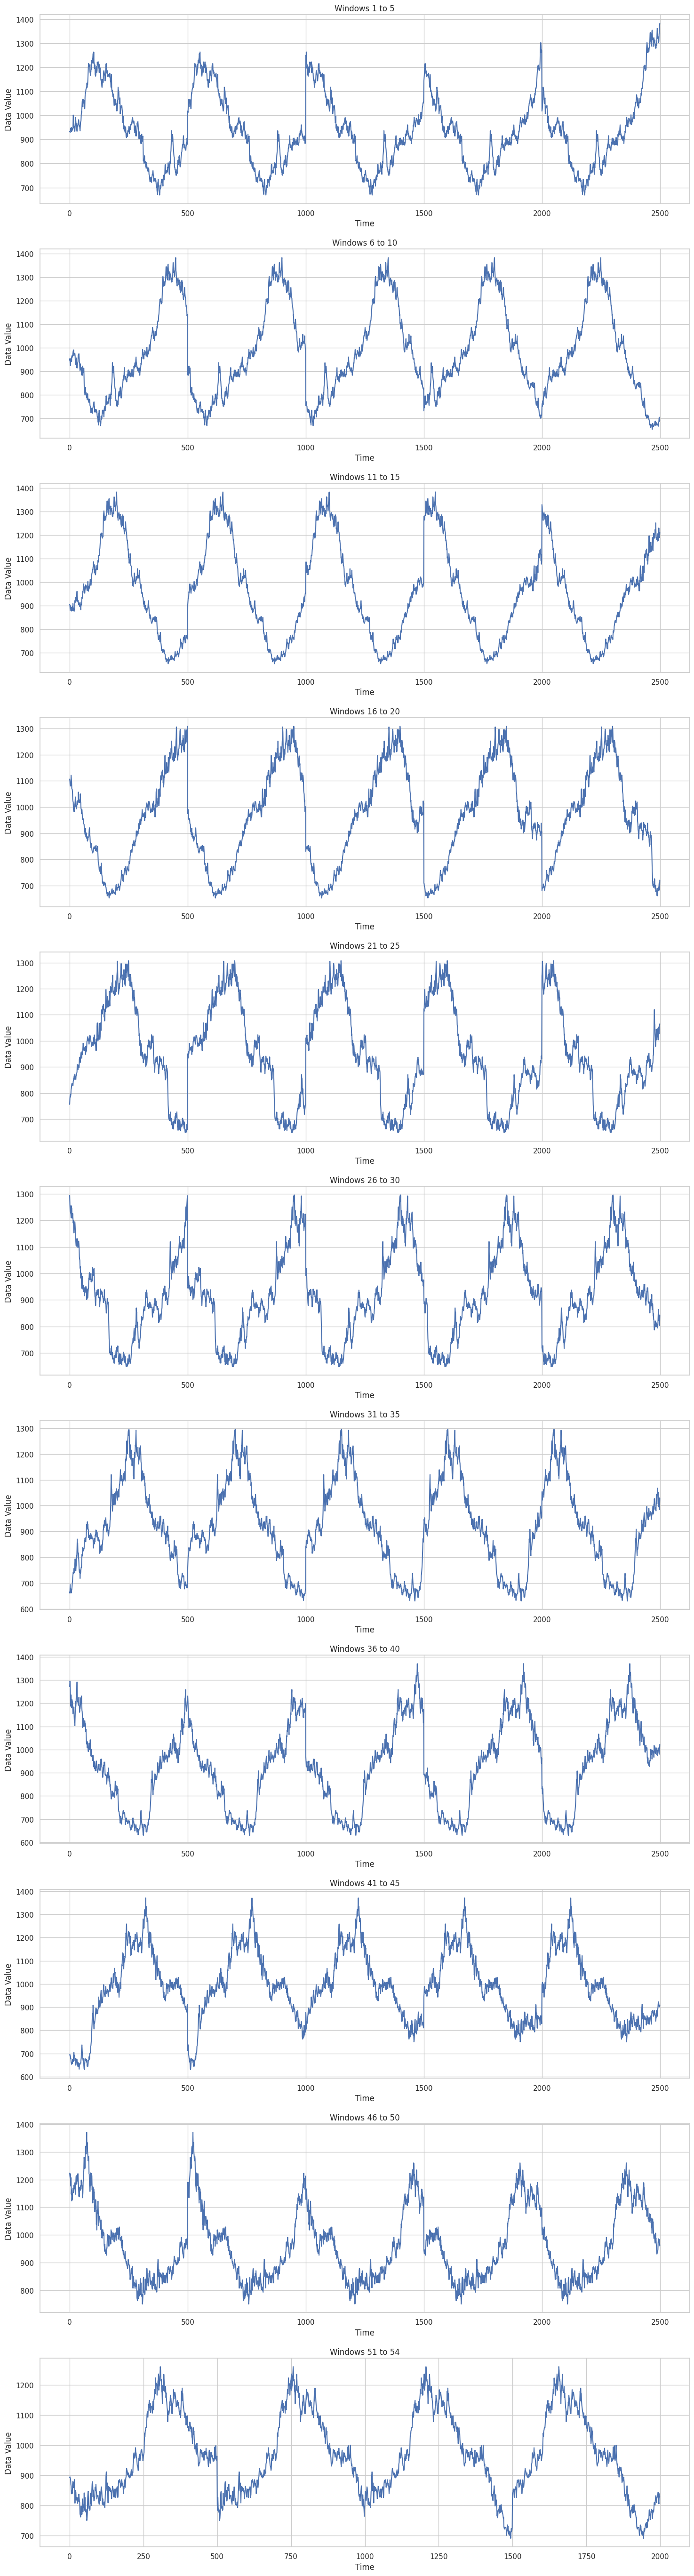

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_sw is your dataset with each element being a window of data
window_size = 5  # Group windows in batches of 20
num_windows = len(X_sw)
num_groups = (num_windows + window_size - 1) // window_size  # Calculate the number of groups

plt.figure(figsize=(15, num_groups * 5))  # Adjust figure size as needed

# Iterate over each group of 50 windows
for i in range(num_groups):
    start = i * window_size
    end = min((i + 1) * window_size, num_windows)
    group_data = np.concatenate(X_sw[start:end])

    # Create a subplot for each group
    plt.subplot(num_groups, 1, i + 1)
    plt.plot(group_data)
    plt.title(f'Windows {start + 1} to {end}')
    plt.xlabel('Time')
    plt.ylabel('Data Value')

plt.tight_layout()
plt.show()


We can see some seasonality and trend in each window , but we can also see that as the window keeps on moving some features disappear over time and new features are born